# Pasajeros Metrorrey

**Estadistica Aplicada**

**Andrik Daniel Vazquez Regalado - 1905622**

**Sesión 14 - 29 de marzo de 2023**

In [19]:
#Librerias básicas
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Librerias especializadas
from statsmodels.tsa.api import seasonal_decompose

In [21]:
# datos

metrorrey = pd.read_csv("metrorrey.csv")

In [22]:
metrorrey.head()

,Mes,Pasajeros,Ingresos
0,2008/01,5869.0,16979.0
1,2008/02,6499.0,18516.0
2,2008/03,5801.0,16719.0
3,2008/04,6932.0,17663.0
4,2008/05,6876.0,21079.0


**Siempre que trabajemos con Series de tiempo debemos DECLARAR una variable con formato de tiempo y debemos convertirla en el index**

In [23]:
# Convertir a Mes en fecha con pandas
metrorrey["Mes"] = pd.to_datetime(metrorrey["Mes"], format = "%Y/%m")

In [24]:
metrorrey.head()

,Mes,Pasajeros,Ingresos
0,2008-01-01,5869.0,16979.0
1,2008-02-01,6499.0,18516.0
2,2008-03-01,5801.0,16719.0
3,2008-04-01,6932.0,17663.0
4,2008-05-01,6876.0,21079.0


In [25]:
metrorrey = metrorrey.set_index("Mes")

In [26]:
# Hay que declarar la frecuencia de los datos
# mensuales "monthly series MS"
metrorrey.index.freq = "MS"

In [27]:
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Mes', length=181, freq='MS')

**Si el dataframe ya tiene una variable de fecha, una frecuencia y es el index; ya se pueden emplear las herramientas de analisis de series de tiempo**

Se comprueba usando el codigo: dataframe.index

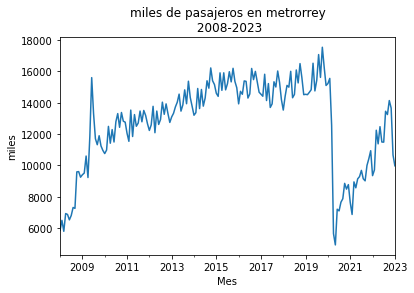

In [29]:
#GRAFICAMOS

metrorrey["Pasajeros"].plot()
plt.title("miles de pasajeros en metrorrey\n 2008-2023")
plt.ylabel("miles")
plt.show();

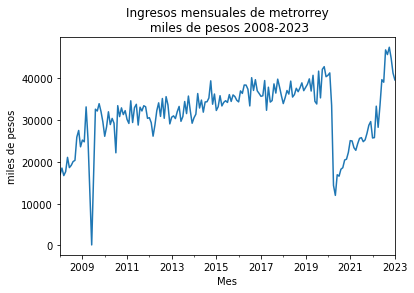

In [30]:
metrorrey["Ingresos"].plot()
plt.title("Ingresos mensuales de metrorrey\n miles de pesos 2008-2023")
plt.ylabel("miles de pesos")
plt.show();

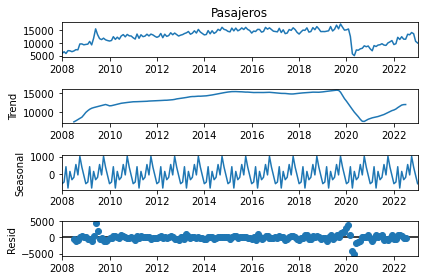

In [31]:
serie1 = seasonal_decompose(metrorrey["Pasajeros"], model="ad")
serie1.plot()
plt.show();

In [32]:
# revisar en que meses hay mas pasajeros en metrorrey
serie1.seasonal.iloc[0:12]

Mes
2008-01-01    -565.338211
2008-02-01    -467.710291
2008-03-01     417.269947
2008-04-01    -815.748883
2008-05-01     145.240614
2008-06-01    -332.910830
2008-07-01    -196.040026
2008-08-01     544.016519
2008-09-01     -56.829133
2008-10-01    1016.647513
2008-11-01     392.821051
2008-12-01     -81.418270
Freq: MS, Name: seasonal, dtype: float64

Anotar Meses con más pasajeros: Marzo, Mayo, agosto, octubre, noviembre.

Meses con menos pasajeros: Enero, febrero, Abril, Junio, Julio, septiembre, diciembre.